In [62]:
import pandas as pd

In [63]:
df=pd.read_csv("census.csv")


In [64]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [ ]:
df=(df.where(df["SUMLEV"]==50)
.set_index(["STNAME","CTYNAME"])
.dropna()
.rename(columns={"ESTIMATEBASE2010":"ESTIMATE BASE 2010"}))

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
import numpy as np

def min_max(row):
    data=row[["POPESTIMATE2010",
             "POPESTIMATE2011",
             "POPESTIMATE2012",
             "POPESTIMATE2013",
             "POPESTIMATE2014",
             "POPESTIMATE2015"]]
    return pd.Series({"min":np.min(data),"max":np.max(data)})

In [ ]:
ds=df.apply(min_max,axis=1)
ds["Diff"]=ds["max"]-ds["min"]

In [ ]:
ds.head()

In [ ]:
ds=df

In [ ]:
ds.head()

In [ ]:
ds=df[min(df[["POPESTIMATE2010",
             "POPESTIMATE2011",
             "POPESTIMATE2012",
             "POPESTIMATE2013",
             "POPESTIMATE2014",
             "POPESTIMATE2015"]])]

In [ ]:
ds.head()

In [ ]:
df.count()

In [ ]:
df.head()

In [ ]:
df.groupby("STNAME").count().sort_values("SUMLEV",ascending=False)

In [ ]:
df.head()

In [3]:
cf=df[df["SUMLEV"]==50]

In [11]:
cd=cf.sort_values(by=["STNAME","CENSUS2010POP"],ascending=False).groupby("STNAME").head(3)

In [12]:
cd.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
3180,50,4,8,56,21,Wyoming,Laramie County,91738,91881,92271,...,-1.200428,15.547274,4.787847,-1.226133,0.278940,-0.973320,17.914554,6.003143,-0.207819,1.673640
3182,50,4,8,56,25,Wyoming,Natrona County,75450,75450,75472,...,7.189319,23.066162,24.322042,-0.958472,-0.061057,7.689674,23.749508,25.085233,-0.110593,0.793743
3172,50,4,8,56,5,Wyoming,Campbell County,46133,46133,46244,...,-2.843479,15.601020,-5.895711,-8.550911,10.916963,-2.649606,15.558684,-5.916543,-8.509402,10.978525
3137,50,2,3,55,79,Wisconsin,Milwaukee County,947735,947736,948301,...,-4.417899,-5.257085,-5.581617,-8.303054,-8.604921,-2.352634,-2.953702,-3.114494,-5.344614,-5.623163
3109,50,2,3,55,25,Wisconsin,Dane County,488073,488075,489187,...,5.468267,4.529574,3.392786,3.107322,2.481328,8.430668,7.729273,6.874337,7.038202,6.383028


In [17]:
cd.groupby("STNAME").sum().sort_values("CENSUS2010POP").head(3).index.tolist()

['Wyoming', 'Vermont', 'North Dakota']

In [ ]:
cf.head()

In [25]:
df.describe(include="all")

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
count,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193,3193,3.193000e+03,3.193000e+03,3.193000e+03,...,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000
unique,NaN,NaN,NaN,NaN,NaN,51,1927,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Texas,Washington County,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,255,30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.840276,2.668650,5.191356,30.259004,101.918572,NaN,NaN,1.933871e+05,1.933969e+05,1.937657e+05,...,-1.639167,-2.528381,-1.288083,-2.271925,-1.362607,-0.655205,-1.445775,-0.200419,-1.038960,-0.096759
std,1.253884,0.807513,1.973991,15.153897,107.626583,NaN,NaN,1.176201e+06,1.176244e+06,1.178710e+06,...,10.407267,11.871798,12.186844,11.440505,12.301558,10.613259,12.228155,12.200064,11.471743,12.265772
min,40.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,8.200000e+01,8.200000e+01,8.300000e+01,...,-128.205128,-147.727273,-109.876862,-178.947368,-84.844838,-128.205128,-147.727273,-102.988031,-178.947368,-62.322703
25%,50.000000,2.000000,4.000000,18.000000,33.000000,NaN,NaN,1.129900e+04,1.129900e+04,1.127500e+04,...,-6.153101,-7.561799,-6.323058,-7.357497,-6.696825,-5.354221,-6.851764,-5.426357,-6.221820,-5.553088
50%,50.000000,3.000000,5.000000,29.000000,77.000000,NaN,NaN,2.642400e+04,2.644600e+04,2.646700e+04,...,-1.544618,-2.549859,-1.771445,-1.988101,-2.026566,-0.626174,-1.537988,-0.788296,-0.911948,-0.872527
75%,50.000000,3.000000,7.000000,45.000000,133.000000,NaN,NaN,7.140400e+04,7.149100e+04,7.172100e+04,...,2.901204,2.626611,3.392786,3.333927,3.794291,4.062151,3.962629,4.700873,4.580444,5.013928


In [19]:
sd.head()

SUMLEV      159140
REGION        8521
DIVISION     16576
STATE        96617
COUNTY      325426
dtype: object

In [20]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [21]:
df.dtypes

SUMLEV           int64
REGION           int64
DIVISION         int64
STATE            int64
COUNTY           int64
                ...   
RNETMIG2011    float64
RNETMIG2012    float64
RNETMIG2013    float64
RNETMIG2014    float64
RNETMIG2015    float64
Length: 100, dtype: object

In [26]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [65]:
df=df[df["SUMLEV"]==50]

In [66]:
df.set_index("STNAME",inplace=True)
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [70]:
import numpy as np
sd=df.groupby(df.index).CENSUS2010POP.agg(np.average)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,avg
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,71339.343284
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,71339.343284
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,71339.343284
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,71339.343284
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,71339.343284


In [71]:
pd.cut(sd,10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [75]:
pd.Timestamp("9.1.23 10:05pm")

Timestamp('2023-09-01 22:05:00')

In [76]:
import numpy as np

In [79]:
np.random.randint(10,100,(1,4))

array([[72, 15, 37, 61]])

In [80]:
sd=pd.DataFrame(np.random.randint(10,100,(4,2)),index=list("ABCD"),columns=list("12"))

In [81]:
sd

,1,2
A,98,93
B,23,62
C,38,72
D,42,98


In [83]:
l=["2nd June 2019","7/12/20","4 Dec 2019","4.5.2018"]
pd.to_datetime(l)

DatetimeIndex(['2019-06-02', '2020-07-12', '2019-12-04', '2018-04-05'], dtype='datetime64[ns]', freq=None)

In [85]:
100+np.random.randint(-5,10,9)

array([ 98, 105, 105, 103, 102,  97, 103, 102,  98])

In [89]:
d=np.random.randint(-5,10,9)
d


array([ 0,  7, -3, -2,  7,  1,  5, -4,  4])

In [91]:
d.cumsum()

array([ 0,  7,  4,  2,  9, 10, 15, 11, 15])

In [93]:
l=pd.date_range("10-1-16",periods=9,freq="2w-sun")

In [108]:
df=pd.DataFrame({"Count1":100+np.random.randint(-4,9,9).cumsum(),"Count2":100+np.random.randint(-4,9,9)},index=l)

In [109]:
df


,Count1,Count2
2016-10-02,104,101
2016-10-16,100,108
2016-10-30,103,105
2016-11-13,104,108
2016-11-27,105,108
2016-12-11,105,97
2016-12-25,107,103
2017-01-08,103,101
2017-01-22,102,100


In [110]:
df.Count1

2016-10-02    104
2016-10-16    100
2016-10-30    103
2016-11-13    104
2016-11-27    105
2016-12-11    105
2016-12-25    107
2017-01-08    103
2017-01-22    102
Freq: 2W-SUN, Name: Count1, dtype: int64

In [111]:
df["Count1"]

2016-10-02    104
2016-10-16    100
2016-10-30    103
2016-11-13    104
2016-11-27    105
2016-12-11    105
2016-12-25    107
2017-01-08    103
2017-01-22    102
Freq: 2W-SUN, Name: Count1, dtype: int64

In [114]:
df.resample("m").agg(["count","min","max","mean","sum"])

Count1                            Count2                           
            count  min  max        mean  sum  count  min  max        mean  sum
2016-10-31      3  100  104  102.333333  307      3  101  108  104.666667  314
2016-11-30      2  104  105  104.500000  209      2  108  108  108.000000  216
2016-12-31      2  105  107  106.000000  212      2   97  103  100.000000  200
2017-01-31      2  102  103  102.500000  205      2  100  101  100.500000  201

In [113]:
df["2016"]

,Count1,Count2
2016-10-02,104,101
2016-10-16,100,108
2016-10-30,103,105
2016-11-13,104,108
2016-11-27,105,108
2016-12-11,105,97
2016-12-25,107,103


In [115]:
%matplotlib inline

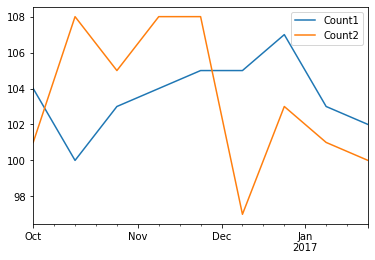

In [116]:
df.plot()